In [52]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [53]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [54]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [55]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [56]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
#base.prepare(engine, reflect=True)
base.prepare(autoload_with=engine)

In [57]:
# View all of the classes that automap found
print(base.classes.keys())

['station', 'measurement']


In [58]:
# Save references to each table
station = base.classes.station
measurement = base.classes.measurement

In [59]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [60]:
# Find the most recent date in the data set.
# Step: Find the most recent date in the dataset
recent_date_str = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
print(recent_date_str)

2017-08-23


In [61]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
recent_date = dt.date.fromisoformat(recent_date_str)
type(recent_date)
# Calculate the date one year from the last date in data set.
year_ago_date = recent_date - dt.timedelta(days=365)
year_ago_date


datetime.date(2016, 8, 23)

SELECT date, avg(prcp)
FROM hawaii_measurement
WHERE date >= year_ago_date
GROUP BY date
ORDER BY date


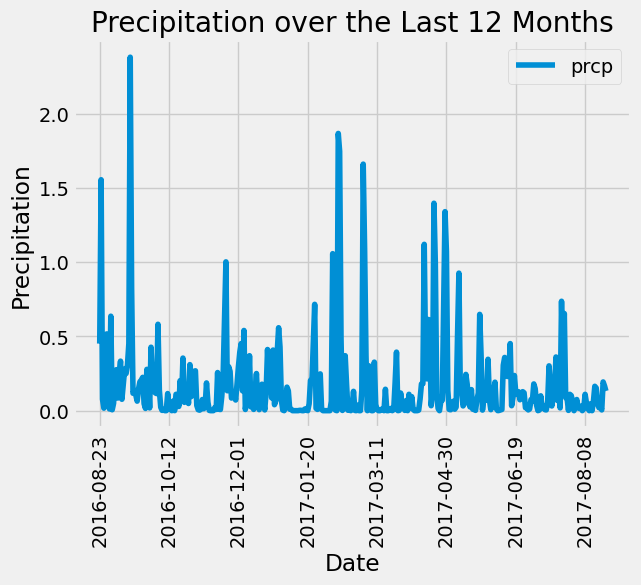

In [62]:
# Perform a query to retrieve the date and precipitation scores
precipitation_scores = session.query(measurement.date, func.avg(measurement.prcp)).\
     filter(measurement.date >= year_ago_date).\
     group_by(measurement.date).\
     all()
precipitation_scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation_scores, columns=["date", "prcp"])

# Sort the dataframe by date
df.sort_values("date", inplace=True)
df

# Use Pandas Plotting with Matplotlib to plot the data
# After creating the session and finding the most recent date
df.plot(x="date", rot=90, xlabel="Date", ylabel="Precipitation", title="Precipitation over the Last 12 Months")
plt.show()






In [63]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [64]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station).count()
print(total_stations)

9


In [65]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station).label('observation_count')).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [66]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station==most_active_station).\
    all()

[(54.0, 85.0, 71.66378066378067)]

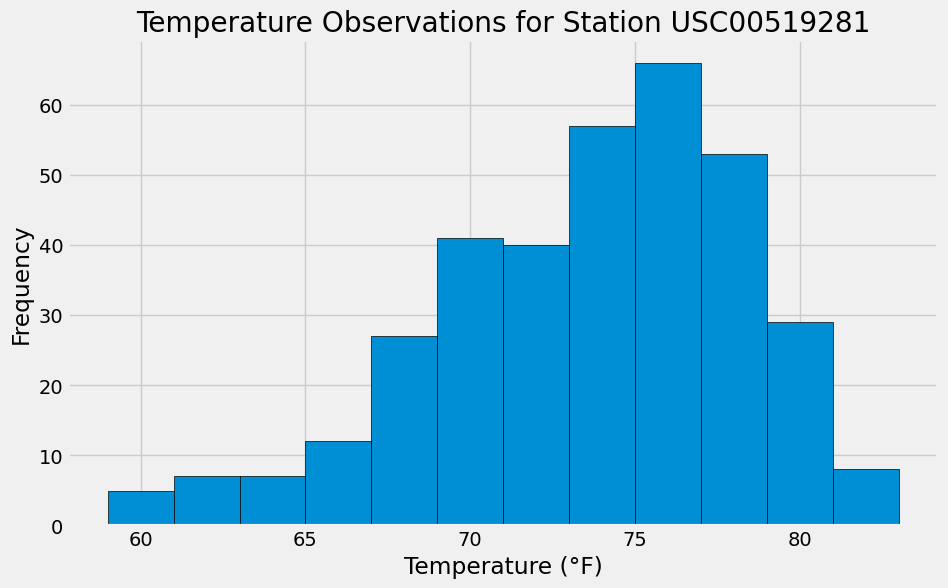

In [67]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(measurement.tobs).\
    filter(measurement.station == most_active_station).\
    filter(measurement.date >= year_ago_date).\
    all()
tobs_df = pd.DataFrame(tobs_data, columns=['tobs'])
plt.figure(figsize=(10, 6))
plt.hist(tobs_df['tobs'], bins=12, edgecolor='black')
plt.title(f'Temperature Observations for Station {most_active_station}')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [68]:
# Close Session
session.close()